### Data reading
Challenge overview

You were tasked with creating a model that predicts the price of a house based on its characteristics.

The project will be divided into two major phases:

Create a model to predict whether a house is expensive or not.
Create a model to predict the exact price of a house.

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer



# reading
#read text file into a Dataframe
df = pd.read_csv("housing-classification-iter6.csv")
df.head()

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch,Expensive,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,8450,65.0,856,3,0,0,2,0,0,0,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,9600,80.0,1262,3,1,0,2,298,0,0,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,11250,68.0,920,3,1,0,2,0,0,0,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,9550,60.0,756,3,1,0,3,0,0,0,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,14260,84.0,1145,4,1,0,3,192,0,0,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [4]:
#The target column (what we want our model to predict) is usually denoted as y. We will "pop" it out from the rest of the data:
# X and y creation
X = df
y = X.pop("Expensive")

### Train-test split
Before performing a deeper exploration, we will split the dataset into 2 chunks: train and test. We will use the train set to find patterns in the data and create a model. The test set will remain untouched, unseen, unexplored. It will be the "reality check" for our model, it will let us know whether our model is able to generalize.

Here, we're using the function train_test_split to shuffle the observations randomly and create the train and test sets for both the X and the y objects at the same time, ensuring that they are shuffled the same way:

In [6]:
# data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123000)

In [7]:
#Data inspection
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotArea        1460 non-null   int64  
 1   LotFrontage    1201 non-null   float64
 2   TotalBsmtSF    1460 non-null   int64  
 3   BedroomAbvGr   1460 non-null   int64  
 4   Fireplaces     1460 non-null   int64  
 5   PoolArea       1460 non-null   int64  
 6   GarageCars     1460 non-null   int64  
 7   WoodDeckSF     1460 non-null   int64  
 8   ScreenPorch    1460 non-null   int64  
 9   MSZoning       1460 non-null   object 
 10  Condition1     1460 non-null   object 
 11  Heating        1460 non-null   object 
 12  Street         1460 non-null   object 
 13  CentralAir     1460 non-null   object 
 14  Foundation     1460 non-null   object 
 15  ExterQual      1460 non-null   object 
 16  ExterCond      1460 non-null   object 
 17  BsmtQual       1423 non-null   object 
 18  BsmtCond

In [8]:
X.shape

(1460, 80)

### To check if there are any missing values

In [9]:
X.isna().sum() 

LotArea             0
LotFrontage       259
TotalBsmtSF         0
BedroomAbvGr        0
Fireplaces          0
                 ... 
PoolQC           1453
Fence            1179
MiscFeature      1406
SaleType            0
SaleCondition       0
Length: 80, dtype: int64

#We found that there are many NaN values. So we need to impute them. For this we divide the data in categorical and numerical columns.

## Categorical encoding - "MANUAL" approach (Without using Pipelines)¶

####  Replacing NaNs in categorical features
##### Here, we will replace NaNs with a string that marks them: “N_A”

In [10]:
# selecting non-numerical columns
X_train_cat = X_train.select_dtypes(exclude="number")

# defining the imputer to use "N_A" as replacement value
cat_imputer = SimpleImputer(strategy="constant", 
                            fill_value="N_A")

# fitting the imputer
cat_imputer.fit(X_train_cat)

# transforming the data & keeping it as a DataFrame
X_cat_imputed = pd.DataFrame(cat_imputer.transform(X_train_cat), 
                             columns=X_train_cat.columns)
X_cat_imputed.head()

,MSZoning,Condition1,Heating,Street,CentralAir,Foundation,ExterQual,ExterCond,BsmtQual,BsmtCond,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Norm,GasA,Pave,Y,CBlock,TA,TA,TA,TA,...,Attchd,Unf,TA,TA,Y,N_A,GdWo,N_A,WD,Normal
1,FV,RRAn,GasA,Pave,Y,PConc,Gd,TA,Gd,TA,...,BuiltIn,Fin,TA,TA,Y,N_A,N_A,N_A,New,Partial
2,RM,Norm,GasA,Pave,Y,PConc,Gd,TA,TA,TA,...,Attchd,Unf,Fa,Fa,Y,N_A,N_A,N_A,WD,Normal
3,RL,Norm,GasA,Pave,Y,CBlock,TA,Gd,Gd,TA,...,Basment,Unf,TA,TA,Y,N_A,MnPrv,N_A,COD,Abnorml
4,RL,Norm,GasA,Pave,Y,CBlock,TA,TA,Gd,TA,...,Attchd,RFn,TA,TA,Y,N_A,MnPrv,N_A,COD,Normal


In [11]:
#X_cat_imputed.isna().sum()  #To check if the NaN#s are replaced, job done!

#### Replacing NaNs in numerical features
#####  replacing numerical NaNs with the mean of their column.

In [12]:
# Selecting numerical columns
X_train_num = X_train.select_dtypes(include="number")

# Imputing the mean
num_imputer = SimpleImputer(strategy="mean")

# Fitting
num_imputer.fit(X_train_num)

# Transforming, keeping a DataFrame
X_num_imputed = pd.DataFrame(num_imputer.transform(X_train_num), 
                             columns=X_train_num.columns)

X_num_imputed.head()

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch,MSSubClass,...,TotRmsAbvGrd,GarageYrBlt,GarageArea,OpenPorchSF,EnclosedPorch,3SsnPorch,MiscVal,MoSold,YrSold,Id
0,10200.0,85.000000,1086.0,3.0,0.0,0.0,2.0,0.0,0.0,20.0,...,6.0,1989.0,490.0,0.0,0.0,0.0,0.0,5.0,2010.0,74.0
1,8004.0,75.000000,832.0,3.0,0.0,0.0,2.0,0.0,0.0,60.0,...,8.0,2009.0,552.0,150.0,0.0,0.0,0.0,12.0,2009.0,461.0
2,2500.0,50.000000,910.0,4.0,1.0,0.0,1.0,0.0,0.0,70.0,...,7.0,1915.0,164.0,0.0,0.0,0.0,0.0,6.0,2009.0,483.0
3,21000.0,69.987539,1809.0,3.0,2.0,0.0,2.0,166.0,0.0,20.0,...,7.0,1953.0,450.0,120.0,192.0,0.0,0.0,10.0,2007.0,114.0
4,11751.0,105.000000,1844.0,3.0,1.0,0.0,2.0,0.0,0.0,20.0,...,7.0,1977.0,546.0,122.0,0.0,0.0,0.0,1.0,2010.0,110.0


In [13]:
# Concatenating all columns
X_imputed = pd.concat([X_cat_imputed, X_num_imputed], axis=1)

X_imputed.head()

,MSZoning,Condition1,Heating,Street,CentralAir,Foundation,ExterQual,ExterCond,BsmtQual,BsmtCond,...,TotRmsAbvGrd,GarageYrBlt,GarageArea,OpenPorchSF,EnclosedPorch,3SsnPorch,MiscVal,MoSold,YrSold,Id
0,RL,Norm,GasA,Pave,Y,CBlock,TA,TA,TA,TA,...,6.0,1989.0,490.0,0.0,0.0,0.0,0.0,5.0,2010.0,74.0
1,FV,RRAn,GasA,Pave,Y,PConc,Gd,TA,Gd,TA,...,8.0,2009.0,552.0,150.0,0.0,0.0,0.0,12.0,2009.0,461.0
2,RM,Norm,GasA,Pave,Y,PConc,Gd,TA,TA,TA,...,7.0,1915.0,164.0,0.0,0.0,0.0,0.0,6.0,2009.0,483.0
3,RL,Norm,GasA,Pave,Y,CBlock,TA,Gd,Gd,TA,...,7.0,1953.0,450.0,120.0,192.0,0.0,0.0,10.0,2007.0,114.0
4,RL,Norm,GasA,Pave,Y,CBlock,TA,TA,Gd,TA,...,7.0,1977.0,546.0,122.0,0.0,0.0,0.0,1.0,2010.0,110.0


## One Hot encoding

In [14]:
# import
from sklearn.preprocessing import OneHotEncoder

# initialize
my_onehot = OneHotEncoder(drop="first")

# fit
my_onehot.fit(X_cat_imputed)

# transform
X_cat_imputed_onehot = my_onehot.transform(X_cat_imputed)

In [15]:
X_cat_imputed_onehot    #Sparse matrix

<1168x220 sparse matrix of type '<class 'numpy.float64'>'
	with 42864 stored elements in Compressed Sparse Row format>

###  Converting the sparse matrix into a DataFrame

In [16]:
df = pd.DataFrame.sparse.from_spmatrix(X_cat_imputed_onehot)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,210,211,212,213,214,215,216,217,218,219
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Retrieving the column names for the "one-hot" columns
NOTE:Please, make sure that the version of sklearn you are using is 1.0 or greater. The method get_feature_names_out() substitutes the already deprecated and removed get_feature_names() one.


In [17]:
colnames = my_onehot.get_feature_names_out(X_cat_imputed.columns)
df.columns = colnames
df.head() 

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Concatenating "one-hot" columns with numerical columns:

In [18]:
X_imputed = pd.concat([df, X_num_imputed], axis=1)

X_imputed.head(3)

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,...,TotRmsAbvGrd,GarageYrBlt,GarageArea,OpenPorchSF,EnclosedPorch,3SsnPorch,MiscVal,MoSold,YrSold,Id
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,6.0,1989.0,490.0,0.0,0.0,0.0,0.0,5.0,2010.0,74.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,8.0,2009.0,552.0,150.0,0.0,0.0,0.0,12.0,2009.0,461.0
2,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,7.0,1915.0,164.0,0.0,0.0,0.0,0.0,6.0,2009.0,483.0


## Categorical encoding - "Automated" approach (Using Pipelines)
### Creating the "numeric pipe" and the "categoric pipe"

In [19]:
# select categorical and numerical column names
X_cat_columns = X.select_dtypes(exclude="number").copy().columns
X_num_columns = X.select_dtypes(include="number").copy().columns

# create numerical pipeline, only with the SimpleImputer(strategy="mean")
numeric_pipe = make_pipeline(
    SimpleImputer(strategy="median"))
 
 # create categorical pipeline, with the SimpleImputer(fill_value="N_A") and the OneHotEncoder
categoric_pipe = make_pipeline(
    SimpleImputer(strategy="most_frequent"), # strategy="constant", fill_value="N_A"
    OneHotEncoder(handle_unknown='ignore')
)

### Using ColumnTransformer a pipeline with 2 branches (the preprocessor)

We simply tell the pipeline the following:

One branch, called "num_pipe", will apply the steps in the numeric_pipe to the columns named in X_num_columns
The second branch, called "cat_pipe", will apply the steps in the categoric_pipe to the columns named in X_cat_columns

In [20]:
#from sklearn.compose import ColumnTransformer
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ("num_pipe", numeric_pipe, X_num_columns),
        ("cat_pipe", categoric_pipe, X_cat_columns),
    ]
)

### Creating the full_pipeline (preprocessor + Decision Tree)

Pipelines are modular. The preprocessor we created above with the ColumnTransformer can become now a step in a new pipeline, that we'll call full_piepline and will include, as a last step, a Decision Tree model:

In [21]:
full_pipeline = make_pipeline(preprocessor, 
                              DecisionTreeClassifier())

### We can then fit this full_pipeline to the data:

Note: notice that we did not fit the preprocessor before —we only fit the pipeline once it has been full assembled.

In [22]:
full_pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  Index(['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'Fireplaces',
       'PoolArea', 'GarageCars', 'WoodDeckSF', 'ScreenPorch', 'MSSubClass',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrA...
       'Neighborhood', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'BsmtFinType2',
       'HeatingQC', 'Electrical', 'Functional', 'GarageType', 'GarageFinish',
       'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence',
       'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object'))])),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [23]:
full_pipeline.predict(X_train)

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

# use the new Pipeline with branches to train a DecisionTree with GridSearch cross validation.

In [28]:
from sklearn.model_selection import GridSearchCV

full_pipeline = make_pipeline(preprocessor, 
                              DecisionTreeClassifier())

param_grid = {
    "columntransformer__num_pipe__simpleimputer__strategy":["mean", "median"],
    "decisiontreeclassifier__max_depth": range(2, 30, 2),
    "decisiontreeclassifier__min_samples_leaf": range(3, 20, 2),
    "decisiontreeclassifier__criterion":["gini","entropy"]
}

search = GridSearchCV(full_pipeline,
                      param_grid,
                      cv=10,
                      verbose=1)

search.fit(X_train, y_train)

Fitting 10 folds for each of 504 candidates, totalling 5040 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('num_pipe',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median'))]),
                                                                         Index(['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'Fireplaces',
       'PoolArea', 'GarageCars', 'WoodDeckSF', 'ScreenPorch', 'MSSubClass',
       'OverallQual', 'OverallCond', 'YearB...
       'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object'))])),
                                       ('decisiontreeclassifier',
                                        DecisionTreeClassifier())]),
             param_grid={'columntransformer__num_pipe__simpleimputer__strategy': ['mean',
                                                                                  'median'],
                         'decisiontreeclassifier__criterion': ['gini',
                                                               'entropy'],
                         'decisiontreeclassifier__max_depth': range(2, 30, 2),
                         'decisiontreeclassifier__min_samples_leaf': range(3, 20, 2)},
             verbose=1)

In [29]:
search.best_params_

{'columntransformer__num_pipe__simpleimputer__strategy': 'mean',
 'decisiontreeclassifier__criterion': 'entropy',
 'decisiontreeclassifier__max_depth': 10,
 'decisiontreeclassifier__min_samples_leaf': 13}

In [30]:
search.best_score_     #0.9295

0.9298334806955497

In [31]:
# training accuracy
y_train_pred = search.predict(X_train)

train_accuracy= accuracy_score(y_train, y_train_pred)

round(train_accuracy, 2)

0.95

In [32]:
# testing accuracy
y_test_pred = search.predict(X_test)

test_accuracy= accuracy_score(y_test, y_test_pred)

round(test_accuracy, 2)

0.95

### confusion matrix

In [35]:
from sklearn.metrics import confusion_matrix

confusion_matrix= confusion_matrix(y_test, y_test_pred, labels=None, sample_weight=None, normalize=None)
confusion_matrix

array([[239,   6],
       [ 10,  37]], dtype=int64)

In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       245
           1       0.86      0.79      0.82        47

    accuracy                           0.95       292
   macro avg       0.91      0.88      0.89       292
weighted avg       0.94      0.95      0.94       292



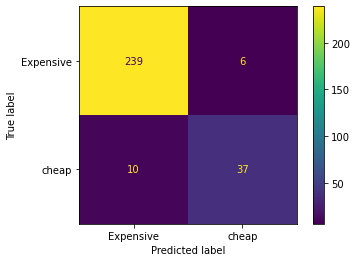

In [37]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

display= ConfusionMatrixDisplay(confusion_matrix,display_labels=['Expensive','cheap'])
display.plot()
plt.show()

In [ ]:
Competition = pd.read_csv('test.csv')
Competition

In [ ]:
c_results= search.predict(Competition)

In [ ]:
Competition['Expensive'] = c_results

In [ ]:
Competition.head()

In [ ]:
submission = Competition[['Id','Expensive']]

In [ ]:
submission.Expensive.value_counts()

In [ ]:
#submission.to_csv('Shruti_Housing_Project.csv', index = False)